## Feedforward Neural Network from Scratch

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical 

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(), # Flatten 28x28 images into a vector
    Dense(128, activation='relu'), # Hidden layer with 128 neurons
    Dense(64, activation='relu'), # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

In [13]:
model.compile(
    optimizer='adam', # Optimizer
    loss='categorical_crossentropy', # Loss function for multi-class classification
    metrics=['accuracy'] # Metrics to monitor during training
)

In [15]:
history = model.fit(x_train, y_train, # Training data and labels
                    epochs=10, # Number of epochs
                    batch_size=32, # Batch size
                    validation_data=(x_test, y_test)) # Validation data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8787 - loss: 0.4127 - val_accuracy: 0.9584 - val_loss: 0.1332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9670 - loss: 0.1113 - val_accuracy: 0.9694 - val_loss: 0.0963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9793 - loss: 0.0688 - val_accuracy: 0.9724 - val_loss: 0.0831
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9719 - val_loss: 0.0874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9770 - val_loss: 0.0788
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9742 - val_loss: 0.0930
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9773 - val_loss: 0.0777
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9926 - loss: 0

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.1233
Test Loss: 0.1022
Test Accuracy: 97.63%


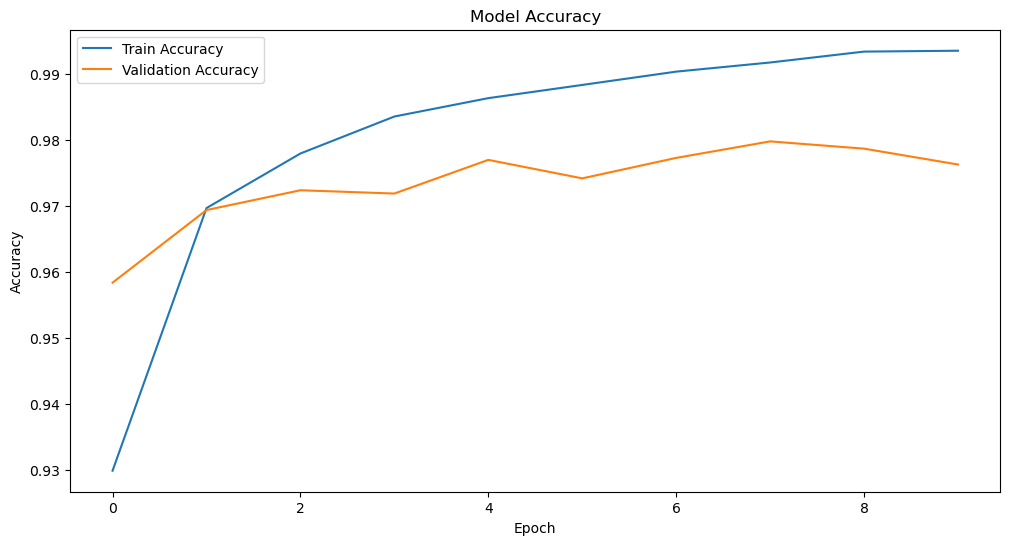

In [21]:
# Visualize training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()